## Face Detection with Haar Cascades

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [2]:
model = cv2.imread('image_01.png',0)
withglass = cv2.imread('image_02.png',0)
group = cv2.imread('image_03.png',0)
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

In [3]:
plt.subplot(1, 3, 1)
plt.imshow(cv2.resize(model,(1000,1000)), cmap='gray') 
plt.title('without glass')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

In [4]:
plt.subplot(1, 3, 2)
plt.imshow(cv2.resize(withglass,(1000,1000)), cmap='gray')
plt.title('withglass')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

In [5]:
plt.subplot(1, 3, 3)
plt.imshow(cv2.resize(group,(1000,1000)), cmap='gray')
plt.title('group')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

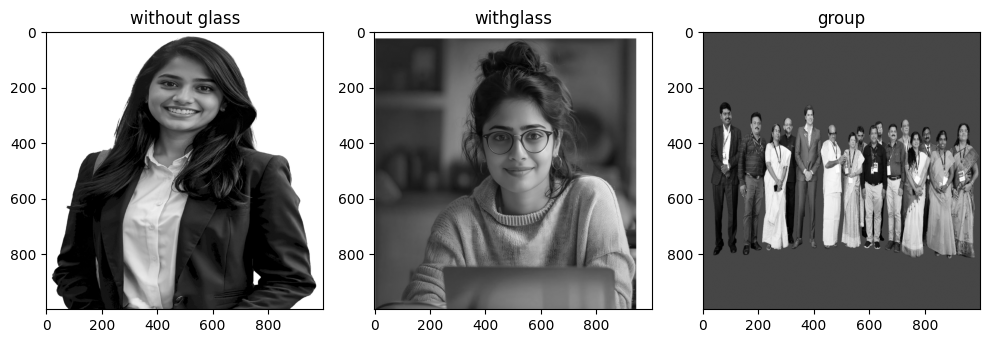

In [6]:
plt.tight_layout()
plt.show()

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [9]:
result = detect_face(withglass)

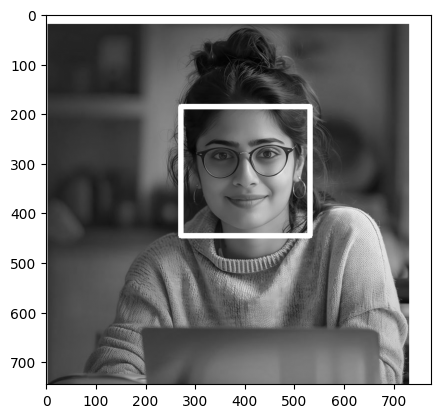

In [10]:
plt.imshow(result,cmap='gray')
plt.show()

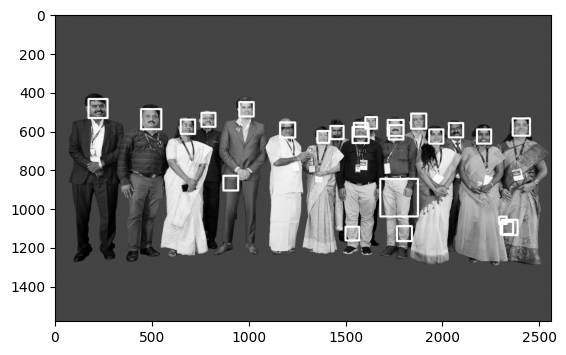

In [11]:
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

In [12]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

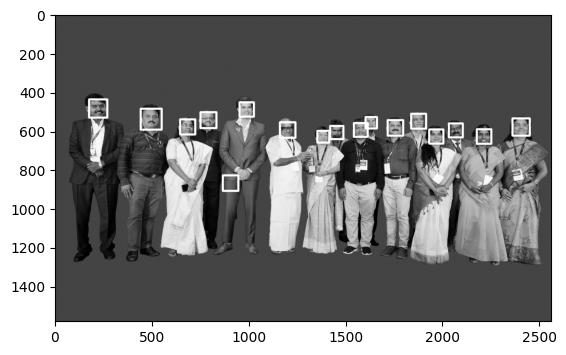

In [13]:
result = adj_detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

## Eye Cascade File

In [14]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [15]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

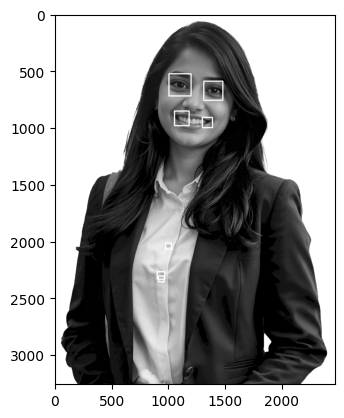

In [16]:

result = detect_eyes(model)
plt.imshow(result,cmap='gray')
plt.show()

In [17]:
eyes = eye_cascade.detectMultiScale(withglass) 


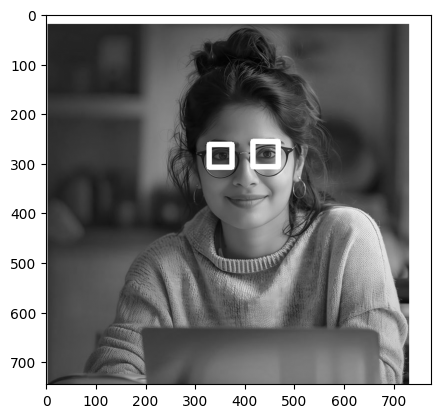

In [18]:
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

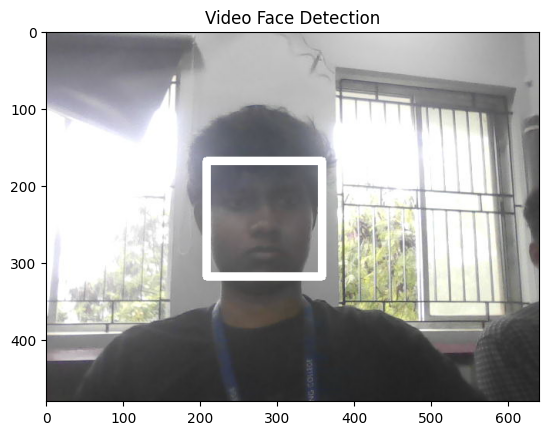

In [ ]:
cap = cv2.VideoCapture(0)

plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read(0)
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')

while True:
    ret, frame = cap.read(0)

    frame = detect_face(frame)

    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

   

cap.release()
plt.close()
